# Car price prediction - Regression

## Machine Learning
### Problem

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.
They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. 


The company wants to know:

        ● Which variables are significant in predicting the price of a car.
        ● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.
    
### Attributes
1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky,
-3 that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car
    
### Objective
You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',50)

In [4]:
data = pd.read_csv('car_prices.csv')

In [5]:
# taking a copy 
df = data.copy()

data = pd.read_csv('car_prices.csv')
df.head()

NameError: name 'df' is not defined

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# dropping car id

df.drop('car_ID',axis =1,inplace=True)

In [7]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
df.symboling = df.symboling.astype('object')

In [9]:
df.symboling.dtype

dtype('O')

In [10]:
df[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('******************')

symboling
[3 1 2 0 -1 -2]
******************
CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)

In [12]:
df['BrandName'] = df.CarName.str.split(expand=True)[0]

In [13]:
df.BrandName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
anomalies = {'alfa-romero':'alfa-romeo', 'maxda':'mazda','Nissan': 'nissan',
 'porcshce':'porsche','toyouta':'toyota', 'vokswagen':'volkswagen','vw':'volkswagen'}

In [15]:
df.BrandName.replace(anomalies,inplace=True)

In [16]:
df.BrandName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'BrandName'],
      dtype='object')

In [18]:
# dropping Carname
df.drop('CarName',axis =1, inplace = True)

In [19]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(include=object).columns.to_list()

In [20]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


In [21]:
df[cat].describe().T

,count,unique,top,freq
symboling,205,6,0,67
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


#### TARGET ANALYSIS

In [22]:
plt.rcParams['figure.figsize'] = [20,10]

In [23]:
target_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
target_uw = df['price'].quantile(0.75) + (1.5*target_iqr)
target_uw

29575.5

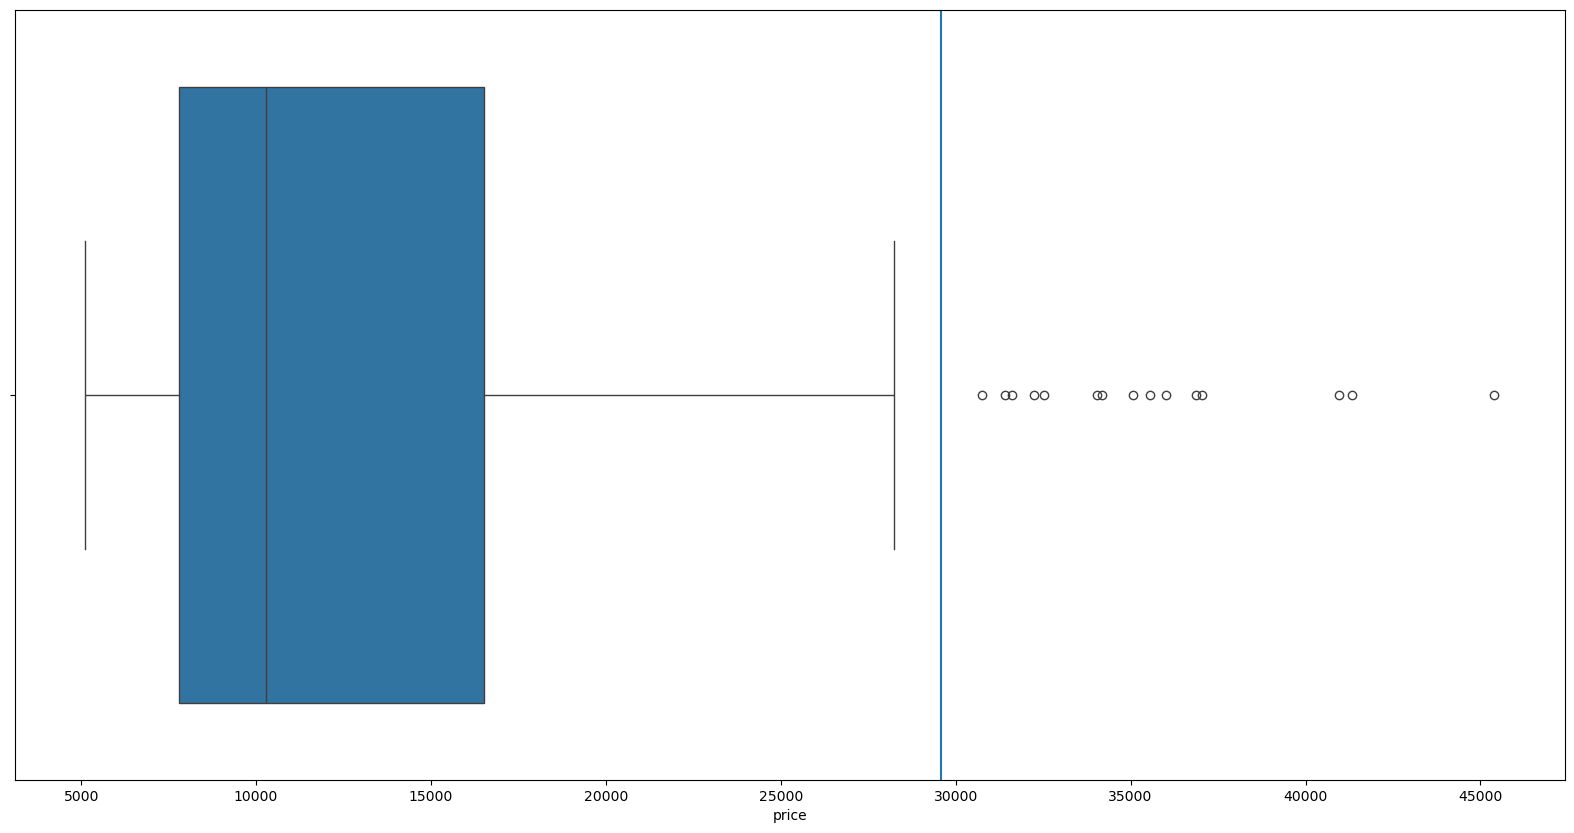

In [24]:
sns.boxplot(x=df['price'])
plt.axvline(target_uw)
plt.show()

#### Univariate analysis - Numeric 

In [25]:
iqr = df[num].quantile(0.75) - df[num].quantile(0.25)

lower_whis = df[num].quantile(0.25)-(1.5*iqr)
upper_whis = df[num].quantile(0.75)+(1.5*iqr)

In [26]:
outliers = df[((df[num] < lower_whis)| (df[num] > upper_whis)).any(axis=1)]

In [27]:
len(outliers)/len(df)*100

32.19512195121951

In [28]:
df[num].skew()

wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

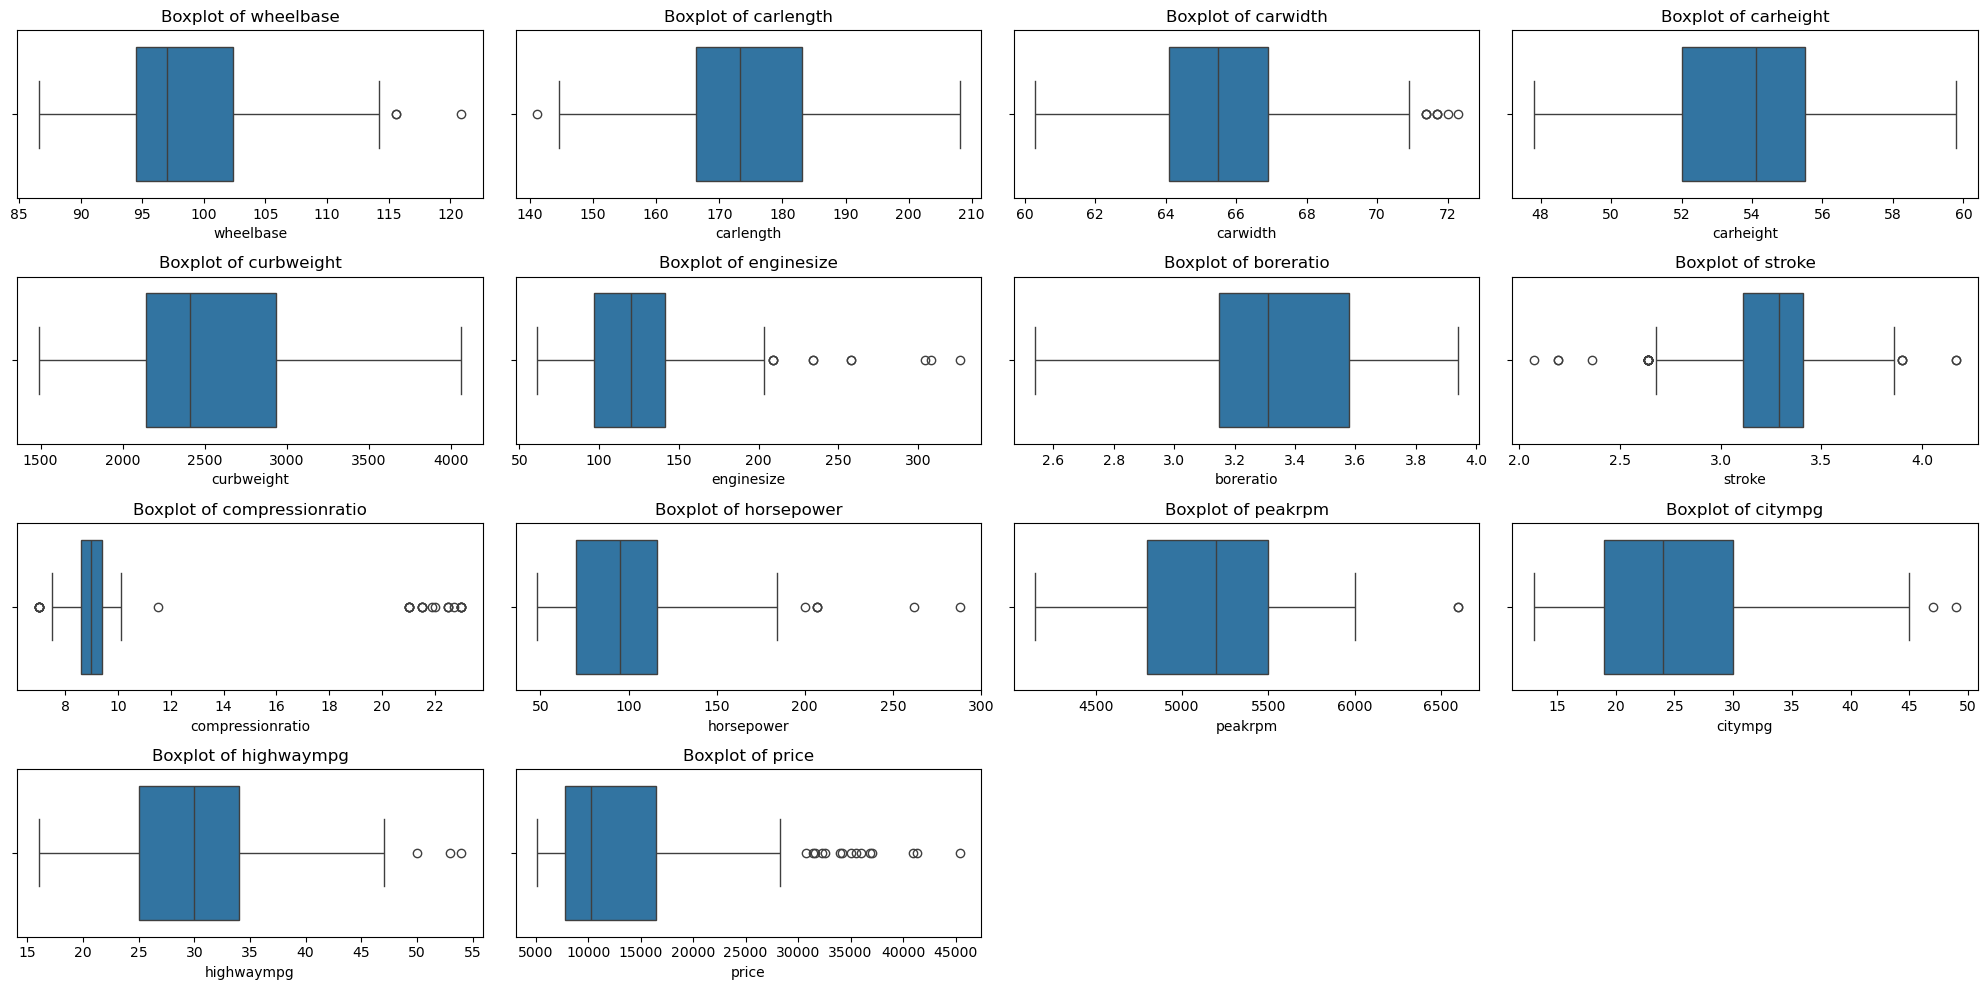

In [29]:
t = 1
for i in num:
    plt.subplot(4,4,t)
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    t+=1
plt.tight_layout()
plt.show()

Many columns has significant number of outliers. Nearly 32% of data are outliers. So we can't ignore them. We may treat them in later steps

#### Univariate analysis - Categoric 

In [30]:
df[cat].nunique()

symboling          6
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
BrandName         22
dtype: int64

In [31]:
for i in cat:
    print(df[i].value_counts(normalize = True)*100)
    print('***********')

symboling
0     32.682927
1     26.341463
2     15.609756
3     13.170732
-1    10.731707
-2     1.463415
Name: proportion, dtype: float64
***********
fueltype
gas       90.243902
diesel     9.756098
Name: proportion, dtype: float64
***********
aspiration
std      81.95122
turbo    18.04878
Name: proportion, dtype: float64
***********
doornumber
four    56.097561
two     43.902439
Name: proportion, dtype: float64
***********
carbody
sedan          46.829268
hatchback      34.146341
wagon          12.195122
hardtop         3.902439
convertible     2.926829
Name: proportion, dtype: float64
***********
drivewheel
fwd    58.536585
rwd    37.073171
4wd     4.390244
Name: proportion, dtype: float64
***********
enginelocation
front    98.536585
rear      1.463415
Name: proportion, dtype: float64
***********
enginetype
ohc      72.195122
ohcf      7.317073
ohcv      6.341463
dohc      5.853659
l         5.853659
rotor     1.951220
dohcv     0.487805
Name: proportion, dtype: float64
***********

### Bivariate analysis

In [32]:
for i in num:
    if i != 'price':
        print(f'Corr btw {i} and price is {df[i].corr(df['price'])}')

Corr btw wheelbase and price is 0.5778155982921501
Corr btw carlength and price is 0.6829200156779625
Corr btw carwidth and price is 0.7593252997415114
Corr btw carheight and price is 0.11933622657049447
Corr btw curbweight and price is 0.8353048793372965
Corr btw enginesize and price is 0.8741448025245119
Corr btw boreratio and price is 0.5531732367984437
Corr btw stroke and price is 0.079443083881931
Corr btw compressionratio and price is 0.06798350579944264
Corr btw horsepower and price is 0.8081388225362217
Corr btw peakrpm and price is -0.08526715027785686
Corr btw citympg and price is -0.68575133602704
Corr btw highwaympg and price is -0.6975990916465568


In [33]:
for i in cat:
    print(df.groupby(i)['price'].mean())
    print('**********')

symboling
-2    15781.666667
-1    17330.681818
 0    14366.965179
 1    10037.907407
 2    10109.281250
 3    17221.296296
Name: price, dtype: float64
**********
fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64
**********
aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64
**********
doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64
**********
carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64
**********
drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64
**********
enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64
**********
enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11574.048426
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
N

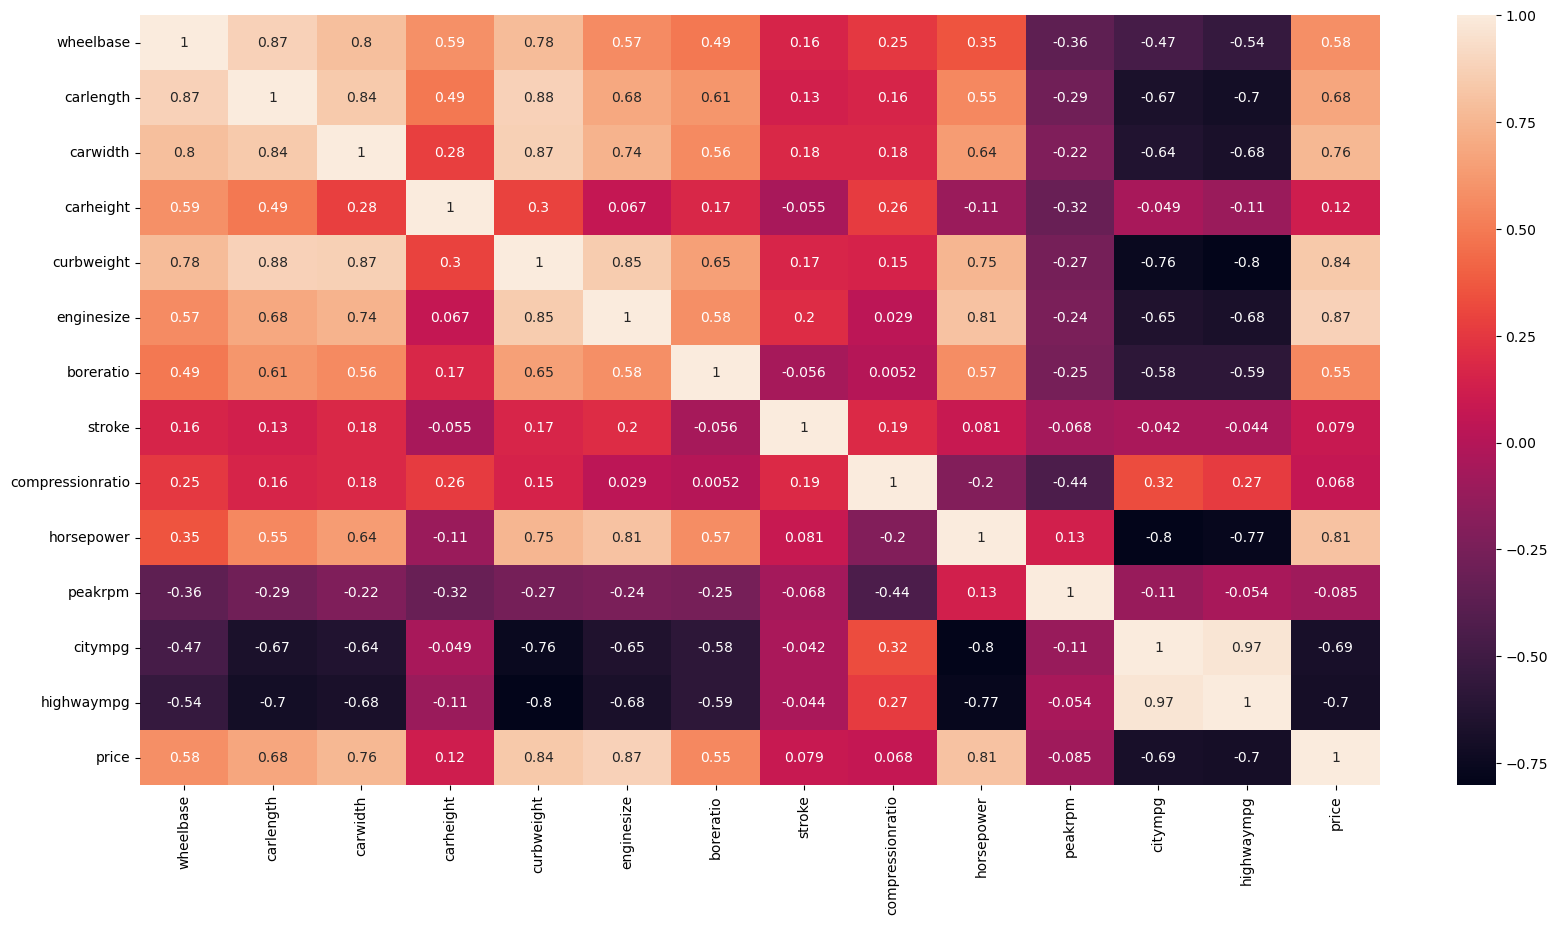

In [34]:
sns.heatmap(df[num].corr(), annot = True)
plt.show()

In [35]:
# Encoding

In [36]:
df.drop('doornumber',axis = 1, inplace = True)

In [37]:
df.symboling = df.symboling.astype(int)

In [38]:
df = pd.get_dummies( df, columns = ['fueltype', 'aspiration', 'enginelocation'], 
               drop_first=True, dtype = int)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
for i in ['carbody', 'enginetype', 'fuelsystem','BrandName','drivewheel']:
    l = LabelEncoder()
    df[i] = l.fit_transform(df[[i]])

In [41]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [42]:
encod = {'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

In [43]:
df['cylindernumber'].replace(encod,inplace=True)

In [44]:
df

,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,BrandName,fueltype_gas,aspiration_turbo,enginelocation_rear
0,3,0,2,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0
1,3,0,2,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,0
2,1,2,2,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,3,1,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1,1,0,0
4,2,3,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,3,2,109.1,188.8,68.9,55.5,2952,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0,21,1,0,0
201,-1,3,2,109.1,188.8,68.8,55.5,3049,3,4,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0,21,1,1,0
202,-1,3,2,109.1,188.8,68.9,55.5,3012,5,6,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0,21,1,0,0
203,-1,3,2,109.1,188.8,68.9,55.5,3217,3,6,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0,21,0,1,0


In [45]:
# Transformation

In [46]:
df[num].skew()

wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

Not considering these columns for transformatio  - Bore ratio, peak rpm, carheight, price 

In [47]:
trans = ['wheelbase','carlength','carwidth','curbweight','enginesize','stroke',
 'compressionratio','horsepower','citympg','highwaympg']

In [48]:
from sklearn.preprocessing import PowerTransformer

In [49]:
p = PowerTransformer(standardize=False)

In [50]:
for i in trans:
    df[i] = p.fit_transform(df[[i]])

In [51]:
df[num].skew()

wheelbase           0.000000
carlength          -0.000424
carwidth            0.000000
carheight           0.063123
curbweight          0.024871
enginesize         -0.002542
boreratio           0.020156
stroke              0.112143
compressionratio    0.034222
horsepower          0.049318
peakrpm             0.075159
citympg             0.001615
highwaympg         -0.000526
price               1.777678
dtype: float64

In [52]:
# Train test split

In [53]:
x = df.drop('price',axis = 1)
y = df['price']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [56]:
# Scaling 

In [57]:
scale = ['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [58]:
for i in scale:
    print(f'Range of {i} {xtrain[i].min(), xtrain[i].max()}')

Range of wheelbase (0.1950360214344693, 0.1950360214509296)
Range of carlength (9.123067621001622, 10.178304154897354)
Range of carwidth (0.1343624485304875, 0.1343624485304913)
Range of carheight (47.8, 59.8)
Range of curbweight (1.6450751462970366, 1.652066413493332)
Range of enginesize (1.0068856377410405, 1.019164040830065)
Range of boreratio (2.54, 3.94)
Range of stroke (9.04551197752838, 43.663464101250966)
Range of compressionratio (0.28998832926397117, 0.29020757156454124)
Range of horsepower (1.4760764432914908, 1.565761624226401)
Range of peakrpm (4150, 6600)
Range of citympg (2.4939850154978305, 3.5283806961345996)
Range of highwaympg (3.5576912082310894, 5.416206600432885)


In [59]:
scale_col = [ 'carlength', 'carheight', 'boreratio','stroke', 'peakrpm']

In [60]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()

In [61]:
for i in scale_col:
    xtrain[i] = m.fit_transform(xtrain[[i]])
    xtest[i] = m.transform(xtest[[i]])


### BASE MODEL

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [63]:
import statsmodels.api as sma

In [64]:
xtrain_c = sma.add_constant(xtrain)
xtest_c = sma.add_constant(xtest)

In [65]:
model1 = sma.OLS(ytrain, xtrain_c).fit()

In [66]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     52.32
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           8.38e-57
Time:                        16:42:38   Log-Likelihood:                -1519.2
No. Observations:                 164   AIC:                             3084.
Df Residuals:                     141   BIC:                             3156.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.415e+13   3.57e+13     -1.515      0.132   -1.25e+14    1.65e+13
symboling             -78.3993    276.470     -0.284      0.777    -624.962     468.164
carbody             -1801.5169    401.803     -4.484      0.000   -2595.855   -1007.179
drivewheel            711.8182    593.552      1.199      0.232    -461.594    1885.231
wheelbase            2.826e+14   1.87e+14      1.515      0.132   -8.61e+13    6.51e+14
carlength            7118.3011   3423.813      2.079      0.039     349.657    1.39e+04
carwidth            -7.248e+12   4.78e+12     -1.515      0.132   -1.67e+13    2.21e+12
carheight            2864.7875   1800.940      1.591      0.114    -695.547    6425.122
curbweight           9.546e+05   5.28e+05      1.807      0.073   -8.96e+04       2e+06
enginetype             72.1043    224.029      0.322      0.748    -370.785     514.994
cylindernumber       3517.5986    444.901      7.906      0.000    2638.060    4397.137
enginesize          -1.099e+06   4.01e+05     -2.739      0.007   -1.89e+06   -3.06e+05
fuelsystem            143.1439    187.740      0.762      0.447    -228.006     514.294
boreratio            7720.1175   2095.442      3.684      0.000    3577.571    1.19e+04
stroke               2636.1481   1936.269      1.361      0.176   -1191.724    6464.020
compressionratio     2.123e+06   1.24e+07      0.171      0.864   -2.24e+07    2.66e+07
horsepower           8198.0898   5.06e+04      0.162      0.872   -9.18e+04    1.08e+05
peakrpm              1843.2314   1822.286      1.011      0.314   -1759.304    5445.767
citympg             -9950.1761   5759.604     -1.728      0.086   -2.13e+04    1436.165
highwaympg           2414.2364   2566.051      0.941      0.348   -2658.670    7487.142
BrandName            -200.6861     42.618     -4.709      0.000    -284.939    -116.433
fueltype_gas        -2221.0183   2176.248     -1.021      0.309   -6523.311    2081.274
aspiration_turbo      594.8880   1051.326      0.566      0.572   -1483.512    2673.288
enginelocation_rear  1.375e+04   2230.934      6.165      0.000    9342.654    1.82e+04
==============================================================================
Omnibus:                       18.433   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.071
Skew:                           0.503   Prob(JB):                     8.91e-09
Kurtosis:                       5.101   Cond. No.                     4.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matr

In [67]:
ypred1 = model1.predict(xtest_c)

In [68]:
summary = pd.DataFrame(columns=['Name', 'R square', 'MSE','RMSE','MAE'])

In [69]:
def metrices(name, ytest, ypred):
    global summary

    r2 = round(r2_score(ytest, ypred),3)
    mse = round(mean_squared_error(ytest, ypred),3)
    rmse = round(np.sqrt(mean_squared_error(ytest, ypred)),3)
    mae = round(mean_absolute_error(ytest, ypred),3)

    result = pd.DataFrame({'Name' : [name], 'R square':[r2], 
                           'MSE':[mse],'RMSE':[rmse],'MAE':[mae]})
    summary = pd.concat([summary,result], ignore_index=True)

    return summary
    

In [70]:
metrices('Model 1 - OLS', ytest, ypred1)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907


In [71]:
# VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [73]:
vif_df = pd.DataFrame()

vif_df['Features'] = xtrain.columns
vif_df['VIF Value'] = [VIF(xtrain.values,i) for i in range(xtrain.shape[1])]

In [74]:
vif_df.sort_values(by ='VIF Value', ascending = False)

,Features,VIF Value
5,carwidth,inf
17,citympg,30.597889
15,horsepower,19.477611
10,enginesize,18.170724
7,curbweight,17.984741
18,highwaympg,17.562355
4,carlength,10.699829
20,fueltype_gas,8.526968
3,wheelbase,7.129778
14,compressionratio,5.957312


In [75]:
# dropping carwidth(high VIF value) in both xtrain and xtest

xtrain_c.drop('carwidth',axis = 1, inplace = True)
xtest_c.drop('carwidth',axis = 1, inplace = True)

In [76]:
model2 = sma.OLS(ytrain, xtrain_c).fit() 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     52.32
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           8.38e-57
Time:                        16:42:39   Log-Likelihood:                -1519.2
No. Observations:                 164   AIC:                             3084.
Df Residuals:                     141   BIC:                             3156.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.512e+13   3.64e+13     -1.515      0.132   -1.27e+14    1.68e+13
symboling             -78.4443    276.463     -0.284      0.777    -624.993     468.104
carbody             -1801.6332    401.799     -4.484      0.000   -2595.963   -1007.303
drivewheel            711.8832    593.546      1.199      0.232    -461.516    1885.282
wheelbase            2.826e+14   1.87e+14      1.515      0.132   -8.62e+13    6.51e+14
carlength            7118.5039   3423.780      2.079      0.039     349.926    1.39e+04
carheight            2864.7307   1800.960      1.591      0.114    -695.645    6425.106
curbweight           9.546e+05   5.28e+05      1.807      0.073   -8.97e+04       2e+06
enginetype             72.0708    224.029      0.322      0.748    -370.820     514.961
cylindernumber       3517.4833    444.912      7.906      0.000    2637.922    4397.045
enginesize          -1.099e+06   4.01e+05     -2.739      0.007   -1.89e+06   -3.06e+05
fuelsystem            143.1858    187.739      0.763      0.447    -227.961     514.333
boreratio            7720.0791   2095.446      3.684      0.000    3577.526    1.19e+04
stroke               2636.1997   1936.265      1.361      0.176   -1191.663    6464.063
compressionratio     2.122e+06   1.24e+07      0.171      0.864   -2.24e+07    2.66e+07
horsepower           8198.7311   5.06e+04      0.162      0.872   -9.18e+04    1.08e+05
peakrpm              1843.1810   1822.284      1.011      0.314   -1759.350    5445.712
citympg             -9950.3013   5759.613     -1.728      0.086   -2.13e+04    1436.059
highwaympg           2414.0354   2566.039      0.941      0.348   -2658.847    7486.918
BrandName            -200.6900     42.618     -4.709      0.000    -284.943    -116.437
fueltype_gas        -2221.1011   2176.246     -1.021      0.309   -6523.390    2081.188
aspiration_turbo      594.9475   1051.326      0.566      0.572   -1483.452    2673.347
enginelocation_rear  1.375e+04   2230.930      6.165      0.000    9342.603    1.82e+04
==============================================================================
Omnibus:                       18.430   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.061
Skew:                           0.503   Prob(JB):                     8.96e-09
Kurtosis:                       5.101   Cond. No.                     1.43e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
ypred2 = model2.predict(xtest_c)

In [78]:
metrices('Model 2 - OLS', ytest, ypred2)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972


In [79]:
vif_df = pd.DataFrame()

vif_df['Features'] = xtrain_c.columns
vif_df['VIF Value'] = [VIF(xtrain_c.values,i) for i in range(xtrain_c.shape[1])]

In [80]:
vif_df.sort_values(by ='VIF Value', ascending = False)

,Features,VIF Value
0,const,inf
17,citympg,30.597602
15,horsepower,19.477479
10,enginesize,18.171918
7,curbweight,17.984281
18,highwaympg,17.562139
5,carlength,10.701019
20,fueltype_gas,8.526979
4,wheelbase,6.732763
14,compressionratio,5.958452


In [81]:
# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
dt = DecisionTreeRegressor(random_state=42)

In [84]:
xtrain.drop('carwidth',axis =1, inplace = True)
xtest.drop('carwidth',axis =1, inplace = True)

In [85]:
model3 = dt.fit(xtrain,ytrain)
ypred3 = model3.predict(xtest)

In [86]:
metrices('Decision Tree', ytest, ypred3)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984


In [87]:
# Decision Tree - Manual Pruning

In [88]:
dt1 = DecisionTreeRegressor(max_depth=5, random_state=42)

In [89]:
model4 = dt1.fit(xtrain,ytrain)
ypred4 = model4.predict(xtest)

In [90]:
metrices('Decision Tree - Pruned', ytest, ypred4)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290


In [91]:
# To check overfitting/ underfitting

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [94]:
ypred4_train = lr.predict(xtrain)
ypred4_test = lr.predict(xtest)

In [95]:
metrices('Linear R - Training', ytrain, ypred4_train)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472


In [96]:
metrices('Linear R - Testing', ytest, ypred4_test)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926


In [97]:
# To check overfitting/ underfitting using Decision Tree

In [98]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=42)

In [99]:
ypred5_train = dt.predict(xtrain)
ypred5_test = dt.predict(xtest)

In [100]:
metrices('Decision Tree - Training', ytrain, ypred5_train)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665


In [101]:
metrices('Decision Tree - Testing', ytest, ypred5_test)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984


In [102]:
# The model overfits the data

In [103]:
from sklearn.linear_model import Ridge, Lasso

In [104]:
rg = Ridge(random_state=42)
rg.fit(xtrain, ytrain)

Ridge(random_state=42)

In [105]:
ypred6 = rg.predict(xtest)

In [106]:
metrices('Ridge Reg', ytest, ypred6)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984
8,Ridge Reg,0.826,1.371858e+07,3703.860,2450.136


In [107]:
ls = Lasso(random_state=42)
ls.fit(xtrain, ytrain)

Lasso(random_state=42)

In [108]:
ypred7 = ls.predict(xtest)

In [109]:
metrices('Lasso Reg', ytest, ypred7)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984
8,Ridge Reg,0.826,1.371858e+07,3703.860,2450.136
9,Lasso Reg,0.819,1.426410e+07,3776.784,2554.474


In [110]:
# Bagging - Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [113]:
ypred8 = rf.predict(xtest)

In [114]:
metrices('Random Forest', ytest, ypred8)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984
8,Ridge Reg,0.826,1.371858e+07,3703.860,2450.136
9,Lasso Reg,0.819,1.426410e+07,3776.784,2554.474


In [115]:
summary.sort_values(by = 'RMSE')

,Name,R square,MSE,RMSE,MAE
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
10,Random Forest,0.956,3.484761e+06,1866.751,1311.222
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
8,Ridge Reg,0.826,1.371858e+07,3703.860,2450.136


In [116]:
# Bagging Regression 

In [117]:
from sklearn.ensemble import BaggingRegressor

In [118]:
lr

LinearRegression()

In [119]:
bag_reg = BaggingRegressor(estimator=lr, random_state=42)

In [120]:
bag_reg.fit(xtrain, ytrain)

BaggingRegressor(estimator=LinearRegression(), random_state=42)

In [121]:
ypred9 = bag_reg.predict(xtest)

In [122]:
metrices('Bagging Reg- Lr', ytest, ypred9)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984
8,Ridge Reg,0.826,1.371858e+07,3703.860,2450.136
9,Lasso Reg,0.819,1.426410e+07,3776.784,2554.474


In [123]:
# Grid Search

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
dt = DecisionTreeRegressor(random_state=42)
dt

DecisionTreeRegressor(random_state=42)

In [126]:
params = { 'max_depth' : [4,6], 'min_samples_split':[2,4]}

In [127]:
gt = GridSearchCV(estimator=dt, param_grid=params, cv = 2, scoring='r2')

In [128]:
gt.fit(xtrain, ytrain)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 6], 'min_samples_split': [2, 4]},
             scoring='r2')

In [129]:
gt.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [130]:
# Tuning with best params

In [131]:
dt_t = DecisionTreeRegressor(max_depth=4, min_samples_split=2, random_state=42)

In [132]:
dt_t.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [133]:
ypred10 = dt_t.predict(xtest)

In [134]:
metrices('Decision Tree - Tunned', ytest, ypred10)

,Name,R square,MSE,RMSE,MAE
0,Model 1 - OLS,0.828,1.360128e+07,3687.992,2415.907
1,Model 2 - OLS,0.828,1.360169e+07,3688.047,2415.972
2,Decision Tree,0.926,5.838385e+06,2416.275,1659.984
3,Decision Tree - Pruned,0.915,6.697249e+06,2587.904,1860.290
4,Linear R - Training,0.891,6.507739e+06,2551.027,1828.472
5,Linear R - Testing,0.828,1.360140e+07,3688.007,2415.926
6,Decision Tree - Training,0.999,8.028971e+04,283.354,64.665
7,Decision Tree - Testing,0.926,5.838385e+06,2416.275,1659.984
8,Ridge Reg,0.826,1.371858e+07,3703.860,2450.136
9,Lasso Reg,0.819,1.426410e+07,3776.784,2554.474
